In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [208]:
setOne = pd.read_csv("2015.csv")
setTwo = pd.read_csv("2016.csv")
setThree = pd.read_csv("2017.csv")
setFour = pd.read_csv("2018.csv")
setFive = pd.read_csv("2019.csv")
totalSet = pd.DataFrame()

gdp = pd.read_csv("gdp_data.csv")

In [209]:
gdp = gdp[gdp["Year"] >= 2015][["Year", "Country", "GDP-Per-Capita"]]
gdp

,Year,Country,GDP-Per-Capita
14520,2015,Aruba,24485.083282
14521,2015,Afghanistan,571.542506
14522,2015,Angola,3409.929285
14523,2015,Albania,4867.916405
14524,2015,Andorra,43858.077514
...,...,...,...
15043,2016,Kosovo,4193.631327
15044,2016,"Yemen, Rep.",667.945437
15045,2016,South Africa,7439.919412
15046,2016,Zambia,1672.345428


In [210]:
setOne.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [211]:
setTwo.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [212]:
setThree.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [213]:
setFour.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [214]:
setFive.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

## Add year into happiness report dataframe

In [215]:
setOne["Year"] = 2015
setTwo["Year"] = 2016
setThree["Year"] = 2017
setFour["Year"] = 2018
setFive["Year"] = 2019

In [216]:
#we want life Expectancy, freedom, generosity, GDP, perception of corruption, score

In [217]:
a = list(setOne.columns)
b = list(setTwo.columns)
c = list(setThree.columns)
d = list(setFour.columns)
e = list(setFive.columns)

allColumns = [a,b,c,d,e]

for x in allColumns:
    for col in range(len(x)):
        if "GDP" in x[col].upper():
            x[col] = "GDP"    
        if "freedom" in x[col].lower():
            x[col] = "Freedom"
        if "life" in x[col].lower():
            x[col] = "Life Expectancy"
        if "score" in x[col].lower():
            x[col] = "Score"
        if "generosity" in x[col].lower():
            x[col] = "Generosity"
        if "corruption" in x[col].lower():
            x[col] = "Corruption"
        if "country" in x[col].lower():
            x[col] = "Country"
        
            
allSet = [setOne, setTwo, setThree, setFour, setFive]

for x in range(len(allSet)):
    allSet[x].columns = allColumns[x]
    allSet[x] = allSet[x][[ "Year", "Country","GDP", "Life Expectancy", "Freedom","Generosity","Corruption", "Score"]]
    totalSet = pd.concat([totalSet, allSet[x]], axis = 0)

totalSet

,Year,Country,GDP,Life Expectancy,Freedom,Generosity,Corruption,Score
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427
...,...,...,...,...,...,...,...,...
151,2019,Rwanda,0.35900,0.61400,0.55500,0.21700,0.41100,3.334
152,2019,Tanzania,0.47600,0.49900,0.41700,0.27600,0.14700,3.231
153,2019,Afghanistan,0.35000,0.36100,0.00000,0.15800,0.02500,3.203
154,2019,Central African Republic,0.02600,0.10500,0.22500,0.23500,0.03500,3.083


In [218]:
#merge data
totalSet = totalSet.merge(gdp, how="left", on = ["Year", "Country"])
totalSet

,Year,Country,GDP,Life Expectancy,Freedom,Generosity,Corruption,Score,GDP-Per-Capita
0,2015,Switzerland,1.39651,0.94143,0.66557,0.29678,0.41978,7.587,77451.981195
1,2015,Iceland,1.30232,0.94784,0.62877,0.43630,0.14145,7.561,51281.987742
2,2015,Denmark,1.32548,0.87464,0.64938,0.34139,0.48357,7.527,62356.743108
3,2015,Norway,1.45900,0.88521,0.66973,0.34699,0.36503,7.522,91451.350523
4,2015,Canada,1.32629,0.90563,0.63297,0.45811,0.32957,7.427,51150.754621
...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,0.35900,0.61400,0.55500,0.21700,0.41100,3.334,NaN
778,2019,Tanzania,0.47600,0.49900,0.41700,0.27600,0.14700,3.231,NaN
779,2019,Afghanistan,0.35000,0.36100,0.00000,0.15800,0.02500,3.203,NaN
780,2019,Central African Republic,0.02600,0.10500,0.22500,0.23500,0.03500,3.083,NaN


In [227]:
totalSet.isnull().sum().sum()

510

In [219]:
X_train, X_test, y_train, y_test = train_test_split(totalSet.drop(columns = ["Score"]), totalSet["Score"], test_size=0.4)

## EDA

### GDP vs Score

<AxesSubplot:xlabel='GDP', ylabel='Score'>

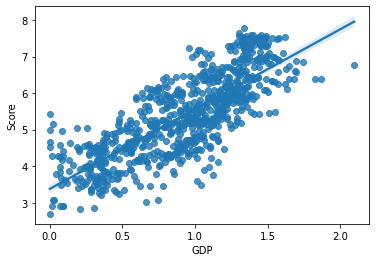

In [220]:
sns.regplot(x='GDP', y="Score", data=totalSet)

### Life Expectancy vs Score

<AxesSubplot:xlabel='Life Expectancy', ylabel='Score'>

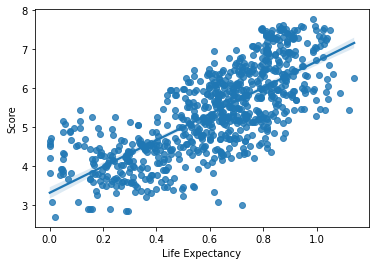

In [221]:
sns.regplot(x='Life Expectancy', y="Score", data=totalSet)

### Corruption vs Score

<AxesSubplot:xlabel='Corruption', ylabel='Score'>

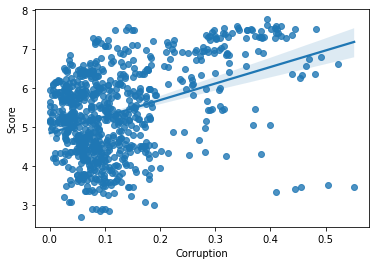

In [222]:
sns.regplot(x='Corruption', y="Score", data=totalSet)

(array([30., 40., 72., 59., 71., 76., 65., 52., 37., 39., 34., 26., 27.,
        20.,  4.,  7.,  5.,  6.,  7.,  7., 13., 12., 11., 10.,  3.,  5.,
         4.,  9.,  4.,  8.,  2.,  3.,  4.,  2.,  2.,  2.,  1.,  1.,  0.,
         1.]),
 array([0.        , 0.01379775, 0.0275955 , 0.04139325, 0.055191  ,
        0.06898875, 0.0827865 , 0.09658425, 0.110382  , 0.12417975,
        0.1379775 , 0.15177525, 0.165573  , 0.17937075, 0.1931685 ,
        0.20696625, 0.220764  , 0.23456175, 0.2483595 , 0.26215725,
        0.275955  , 0.28975275, 0.3035505 , 0.31734825, 0.331146  ,
        0.34494375, 0.3587415 , 0.37253925, 0.386337  , 0.40013475,
        0.4139325 , 0.42773025, 0.441528  , 0.45532575, 0.4691235 ,
        0.48292125, 0.496719  , 0.51051675, 0.5243145 , 0.53811225,
        0.55191   ]),
 <BarContainer object of 40 artists>)

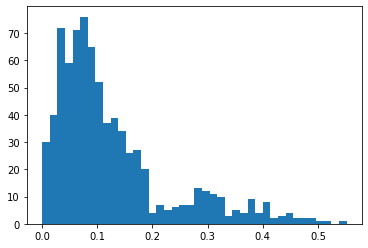

In [223]:
plt.hist(totalSet["Corruption"], bins=40)

### Freedom vs Score

<AxesSubplot:xlabel='Freedom', ylabel='Score'>

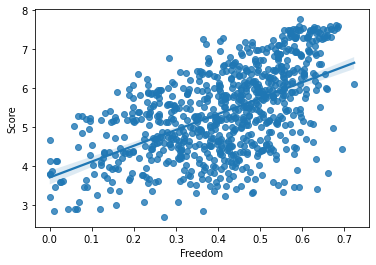

In [224]:
sns.regplot(x='Freedom', y="Score", data=totalSet)

### Generosity vs Score

<AxesSubplot:xlabel='Generosity', ylabel='Score'>

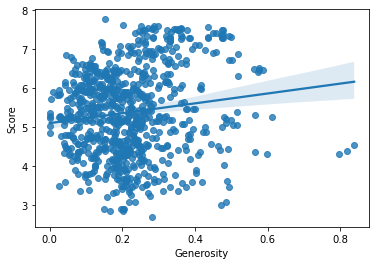

In [225]:
sns.regplot(x='Generosity', y="Score", data=totalSet)

(array([ 8., 16., 28., 42., 36., 55., 46., 48., 75., 59., 56., 56., 54.,
        33., 21., 34., 17., 19., 14., 11.,  7.,  5., 14., 11.,  5.,  0.,
         2.,  4.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         2.]),
 array([0.        , 0.02095188, 0.04190376, 0.06285564, 0.08380752,
        0.1047594 , 0.12571127, 0.14666315, 0.16761503, 0.18856691,
        0.20951879, 0.23047067, 0.25142255, 0.27237443, 0.29332631,
        0.31427819, 0.33523006, 0.35618194, 0.37713382, 0.3980857 ,
        0.41903758, 0.43998946, 0.46094134, 0.48189322, 0.5028451 ,
        0.52379698, 0.54474885, 0.56570073, 0.58665261, 0.60760449,
        0.62855637, 0.64950825, 0.67046013, 0.69141201, 0.71236389,
        0.73331577, 0.75426764, 0.77521952, 0.7961714 , 0.81712328,
        0.83807516]),
 <BarContainer object of 40 artists>)

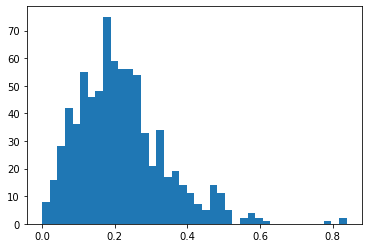

In [226]:
plt.hist(totalSet["Generosity"], bins=40)